In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
file_path = 'NEW DATA_ALL.csv'
df = pd.read_csv(file_path, skiprows=15, usecols=range(7))

print(df.head())

     TIME    Vab   Vbc    Vca    Ia    Ib    Ic
0 -0.0449  221.0  19.0 -261.0  2.23 -3.91  2.00
1 -0.0449  219.0  14.9 -262.0  2.27 -3.95  2.08
2 -0.0448  217.0  16.9 -262.0  2.17 -3.85  1.99
3 -0.0448  215.0  16.9 -261.0  2.19 -3.86  2.00
4 -0.0448  218.0  18.4 -261.0  2.26 -3.85  2.17


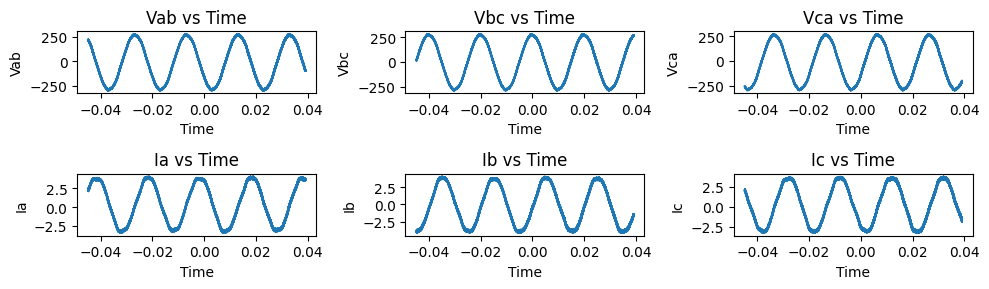

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(10, 3))
axs = axs.flatten()
columns = ['Vab', 'Vbc', 'Vca', 'Ia', 'Ib', 'Ic']

for i, col in enumerate(columns):
    axs[i].plot(df['TIME'], df[col])
    axs[i].set_title(f'{col} vs Time')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [35]:
def time_period(signal, time):
    zero = np.where(np.diff(np.sign(signal)))[0]
    t = [time[zero[0]]]
    zero_index = [zero[0]]
    i = 1
    while i < len(zero) - 1:
      if (zero[i] - zero[i-1] > 100):
        t.append(time[zero[i]])
        zero_index.append(zero[i])
        i += 1
      else:
        i += 1
    period = t[2] - t[0]
    return period, t, zero_index

T_vab, t1, z1 = time_period(df['Vab'].values, df['TIME'].values)

print(f"Time Period: {T_vab:.5f}s")
print(f"Time(in s) at which Vab is zero: {t1}")
print(f"Index of time(in s) at which Vab is zero: {z1}")

Time Period: 0.01990s
Time(in s) at which Vab is zero: [-0.0419, -0.0317, -0.022, -0.0117, -0.00198, 0.0083, 0.018, 0.0283, 0.038, 0.0391, 0.0083, 0.018, 0.0283, 0.038]
Index of time(in s) at which Vab is zero: [913, 4115, 7147, 10359, 13398, 16610, 19643, 22862, 25885, 26249, 29423, 32456, 35675, 38698]


In [36]:
Vab_T = df['Vab'].iloc[z1[2]:z1[4]+1]
Ia_T = df['Ia'].iloc[z1[2]:z1[4]+1]

Vcb_T = -df['Vbc'].iloc[z1[2]:z1[4]+1]
Ic_T = df['Ic'].iloc[z1[2]:z1[4]+1]

Vab_T_rms = np.mean(Vab_T**2)**0.5
Ia_T_rms = np.mean(Ia_T**2)**0.5
W1 = np.mean(Vab_T*Ia_T)

Vcb_T_rms = np.mean(Vcb_T**2)**0.5
Ic_T_rms = np.mean(Ic_T**2)**0.5
W2 = np.mean(Vcb_T*Ic_T)


# Readings of Wattmeter 1
print("Readings of Wattmeter 1: ")
print(f"Voltage Reading: {Vab_T_rms:.5f} V")
print(f"Current Reading: {Ia_T_rms:.5f} A")
print(f"Real Power: {W1:.5f} W")

# Readings of Wattmeter 2
print("\nReadings of Wattmeter 2: ")
print(f"Voltage Reading: {Vcb_T_rms:.5f} V")
print(f"Current Reading: {Ic_T_rms:.5f} A")
print(f"Real Power: {W2:.5f} W")

Readings of Wattmeter 1: 
Voltage Reading: 198.78438 V
Current Reading: 2.56694 A
Real Power: -21.40966 W

Readings of Wattmeter 2: 
Voltage Reading: 197.06823 V
Current Reading: 2.42733 A
Real Power: 377.91571 W


In [37]:
activePower = W1+W2
powerFactor = np.cos(np.arctan(np.sqrt(3)*(W2-W1)/(W2+W1)))
reactivePower = np.sqrt(3)*(W2-W1)

print(f"Total Active Power: {activePower:.5f} W")
print(f"Powerfactor: {powerFactor:.5f}")
print(f"Total Reactive Power: {reactivePower:.5f} var")

Total Active Power: 356.50606 W
Powerfactor: 0.45816
Total Reactive Power: 691.65183 var
